# Fundamentals of Data Science - STAT 411

We start with some examples of the kinds of problems we will consider in this class. I am calling these motivating problems because we will return to them again and again as class goes on.

Please read the syllabus. We will not take time to go over it entirely here. You should have an email from me with:
1. The syllabus as an HTML file,
2. A link to Github for our class, 
3. A link inviting you to join the Slack channel for our class, and 
4. A link to a survey asking for some information from you.

Before we get started with the statistics, some preliminaries:

## Anaconda, Jupyter, and Python

We will be using Jupyter and Python for class. Python is a programing language, Jupyter is a shell for intereacting with it and creating nice files, and Anaconda is a distribution that will install both systems for you and manage most of the packages we need.

Some details:
- [You will need to download and install Anaconda from this website](https://www.anaconda.com/)
- You will then need to go into the package manager under *Environments* and install pandas, seaborn, and scikitlearn. If your Jupyter is updated during class you will need to install these pakcages again.

My colleagues doing numerical analysis and data science use Jupyter/Python to take a project all the way from exploration and development, though analysis, and to publication and presentation.

## Github

[All of the course materials, including the syllabus, will be in the Github repository for our class, available here](https://github.com/virgilpierce/STAT_411). This is a public repository. There are three ways to use it to get the course files. You can download the course as a .zip file, you can create a Github account and clone it yourself, and finally you could create a Github account and make a pull request for it. It will be updated as class goes on, so you may want to get in a habit of regularly making a new Fetch.

Later in class we will cover how to use Github with your team for versioning control.

I will accept, and be grateful for, commit requests from you to fix typos in the course files, or you can add them to the "issues" tab in Github. You will also notice that I am tracking some issues there.

## Python

The course will use a lot of Python, however I am not assuming you already know it. We will have example files to start from, and it is generally speaking an easy yet powerful language to learn. You have my permission to stop us at any point and ask any question about Python you want.

### Why Python

There is a fair amount of debate about whether Data Science should be taught with Python, R, or some other language. Here is why I am using Python and asking you to use it, however as I say this is not a settled question.

- Python is realitvely easy to learn. It is a language for which readability counts,
- Python is highly used in Mathematics, Statistics and Science. It is generally more broadly applicable than R,
- It is widely used in industry for Data Science and other computations,
- Python is the recomended language for making use of cloud computing platforms (Google Cloud and Amazon Web Services), and it includes modules for Parallel Programing,
- It is my assertion that if you learn Data Science with Python, you will easily be able to pick up R if you find yourself in a shop that uses it,
- The bulk of my experience with Data Science has been through Python,
- I want the class to understand what you are doing, so we need to fix the language the whole class uses.


## Some Prelimaries

In [1]:
# We will typically need four modules

import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library

In [2]:
# If you are new to Python these commands are loading external module files that 
# contain list of commands we need. The commands are accessed by <name of module>.<name of command>
# For example

np.sqrt(9)

# Pulls the sqrt() function from the numpy package. I am using the alias np for numpy (from the 'as np')
# to save myself three letters each time I use a numpy command. 

3.0

Note what happened here:

- The "#" characters represent comment lines - they are not read by the interpreter,
- In Jupyter the last executed expression of a cell is cycled through the print() function and displayed as nice output.

### Getting Help

First there is inline help from two functions:

In [3]:
# Adding a question mark after a command gives us an overview of that command

list?

Init signature: list(iterable=(), /)
Docstring:     
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
Type:           type
Subclasses:     _HashedSeq, StackSummary, SList, _ImmutableLineList, FormattedText, NodeList, _ExplodedList, Stack, _Accumulator, _ymd, ...


In [4]:
# the dir() function lists attributes a function has:
# However many of the attributes are so-called system attributes and not very helpful. 
# I typically ask Python to drop them using a simple list comprehension.

[x for x in dir(list) if not '__' in x]

# You can read this command in English: [] - make a list; of elements x for each x in 
# dir(list) if x does not contain the string '__'

['append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

What we get is a list of commands that can apply to a list in Python.

Then there is google help. Particularly if you are using one of the packages like seaborn, there is extensive online documentation about how it works. Just look. Most problems can be resolved in a few minutes.

I have reference books, but my warning to you is not to spend to much money on them. The online help has more detail, and in my experience the books will never have the right details, you end up using the inline and online help more.

## First Motivating Example - Baseball Players

Before we get too far, lets look at an example to see what we are aiming at in this class. Consider the dataset of Major League Baseball Players height and weight.

<img src = "Images/tj_bohn_autograph.jpg" width=200>

In [5]:
# Read in the major league players data set

major = pa.read_csv('Data Sets/Major League Height-Weight.csv')   # creates a pandas Dataframe from a .csv file

# Each row of a data frame is a data point - in this case a player.
# Each column is a feature about the data point (its coordinates if you will)

major.head()   # displays the first few rows

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Note that in order to be following along here and executing the code, you will have to have downloaded the notebook file as well as the Data Set file, and kept them in the same relative directories. I really suggest just cloning the whole repository.

In [6]:
# Rename the Height and Weight columns so it is easier to refer to them.

major = major.rename({'Height(inches)':'Height', 'Weight(pounds)':'Weight'}, axis=1)  

# This is using a dictionary {'old name':'new name' } to change the names
# axis = 1 tells it we are changing columns
# axis = 0 would tell it we were changing rows

major.tail()  # displays the last few rows

,Name,Team,Position,Height,Weight,Age
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01
1033,Josh_Kinney,STL,Relief_Pitcher,73,195.0,27.92


In [7]:
# We can grab an individual row:

major.loc[500]

Name         T.J._Bohn
Team               ATL
Position    Outfielder
Height              77
Weight             200
Age              27.12
Name: 500, dtype: object

In [8]:
# Grabbing more than one row, displays them as actual rows:

major.loc[500:501]

,Name,Team,Position,Height,Weight,Age
500,T.J._Bohn,ATL,Outfielder,77,200.0,27.12
501,Tim_Hudson,ATL,Starting_Pitcher,73,164.0,31.63


In [9]:
# We can grab a subset of the columns

major.loc[:, ['Height', 'Weight']].head()   # using head to only display part of them

,Height,Weight
0,74,180.0
1,74,215.0
2,72,210.0
3,72,210.0
4,73,188.0


We will use ONLY real data in this class. Real data is messy. 

Our first data set is missing a value for one of the players:

In [10]:
major[pa.isna(major.Weight)]    # pa.isna(major.Weight) gives a list of True or False values, True is 
                                    # for a player (row) that is missing a value for the Weight feature (column)

,Name,Team,Position,Height,Weight,Age
640,Kirk_Saarloos,CIN,Starting_Pitcher,72,NaN,27.77


For now it is probably simplest to just not use this player in our analysis. But generally we should ask: What should we do with missing data?

In [11]:
major = major.drop(640, axis=0)    # Remove row 640 (note axis = 0 for 'row')

In [12]:
# Check the size of our dataframe

major.shape  # Our dataframe has 1033 players (rows) and 6 features (columns)

# We will **OFTEN** be thinking about the dataframe as a matrix, hence the rows x columns language.

(1033, 6)

### First Question

What are the relationships between the numeric features of the players?

We start by just consider the histograms and scatter plots for the numerical features.

We will use the seaborn package usually for plots. [I have found the online help available here to be very helpful](https://seaborn.pydata.org/).

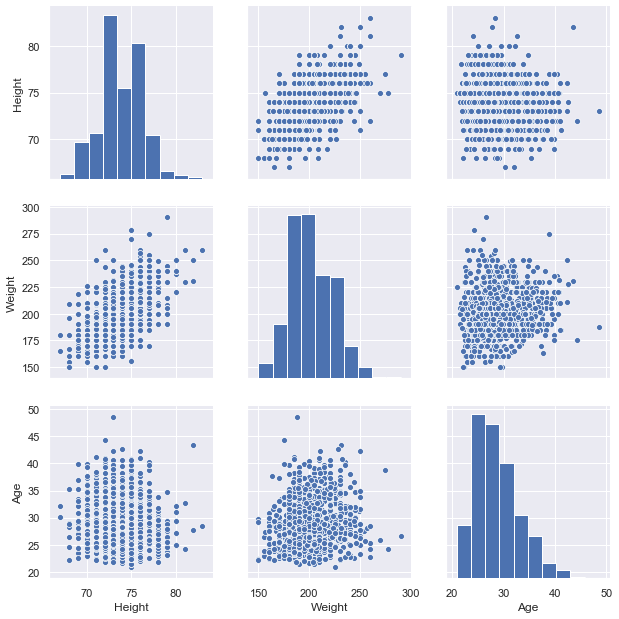

In [13]:
# Make a plot of the dataset by pairs for the numerical data

sn.set(style = 'darkgrid')   # seaborn makes nice looking plots - check the galleries for the various options

p = sn.pairplot(major)   

# Note that seaborn.pairplot will ignore categorical data (like position) unless we pass it an option.


p.fig.set_size_inches(9, 9)  

# My one major frustration with seaborn is that changing the size of a plot or figure depends
# on what plotting command you happen to be using. There is no one way to do it. However the
# plots it makes are generally so nice, that I just deal with it.

# In any case, depending on the size of the monitor you are viewing this on, you may need to adjust
# the (10, 10) above to something else.

In the figures above:
- on the diagonal: each player is a box in one of the bars.
- on the off diagonals: each player is one of the dots.

There is a lot to notice here, and we will be coming back to this dataset again and again.

I want to point out two things right away. It is not clear, from the historgrams for the three features (Height, Weight, and Age) that the distributions are normal - Age in particular appears to be definitely not normal.

### Second Question

We might ask, how does a player's height or weight depend on the position they play?

In [14]:
set(major.Position)   # Make a set of all of the positions (eliminates duplicates)

# Note there are two ways to get the values for a feature. 
# major.Position 
# or major.loc[:, 'Position']

# Actually there is a third way. Note that 'Position' is third feature, so we can find it with:
# major.iloc[:, 2]
# iloc means locating entries by 'Integer Index' rather than actual tag.

{'Catcher',
 'Designated_Hitter',
 'First_Baseman',
 'Outfielder',
 'Relief_Pitcher',
 'Second_Baseman',
 'Shortstop',
 'Starting_Pitcher',
 'Third_Baseman'}

In [15]:
# We are going to make a dictionary of key:value pairs to recode the Position feature to 
# 'Pitcher' and 'Not Pitcher'

pos_dict = {x:'Pitcher' for x in list(set(major.Position)) if 'Pitcher' in x}
pos_dict2 = {x:'Not Pitcher' for x in list(set(major.Position)) if not 'Pitcher' in x}

# Using dictionary comprehensions

pos_dict.update(pos_dict2) # merge the two dictionaries

major_2 = major.copy()   # pandas.dataframe is a mutable object so we use the .copy() command 
                         # otherwise changes to major_2 will change major
    
major_2.Position = major_2.Position.map(pos_dict)  # use the dictionary we made to recode the values with .map()

major_2 # print the dataframe to check if there is a problem

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Not Pitcher,74,180.0,22.99
1,Paul_Bako,BAL,Not Pitcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Not Pitcher,72,210.0,30.78
3,Kevin_Millar,BAL,Not Pitcher,72,210.0,35.43
4,Chris_Gomez,BAL,Not Pitcher,73,188.0,35.71
5,Brian_Roberts,BAL,Not Pitcher,69,176.0,29.39
6,Miguel_Tejada,BAL,Not Pitcher,69,209.0,30.77
7,Melvin_Mora,BAL,Not Pitcher,71,200.0,35.07
8,Aubrey_Huff,BAL,Not Pitcher,76,231.0,30.19
9,Adam_Stern,BAL,Not Pitcher,71,180.0,27.05


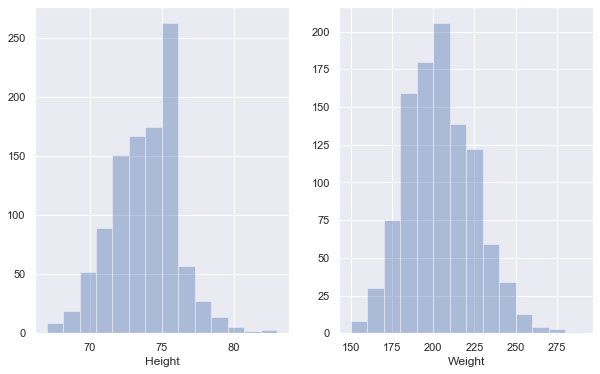

In [17]:
# Make a histogram of the heights and weights

sn.set(style = 'darkgrid')  # Set the style

f, ax = plt.subplots(1, 2, sharey=False, figsize = (10, 6))   # Make a 1 x 2 grid for multiple plots
sn.distplot(major_2.Height, ax=ax[0], kde=False, bins=14)  
sn.distplot(major_2.Weight, ax=ax[1], kde=False, bins=14);

# These are (mostly) copies of the corresponding histograms from the facet-grid above;
# Do you notice the difference?

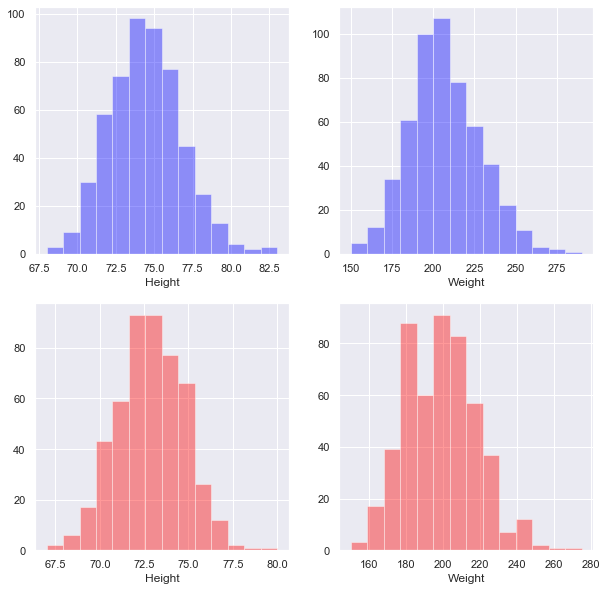

In [19]:
# Make them again but by player position also

sn.set(style = 'darkgrid') 

f, ax = plt.subplots(2, 2, sharey=False, figsize = (10, 10))   # Make a 2 x 2 grid for multiple plots
sn.distplot(major_2[major_2.Position=='Pitcher'].Height, ax=ax[0, 0], color = 'blue',
            label = 'Pitchers', kde=False, bins=14)  
sn.distplot(major_2[major_2.Position=='Pitcher'].Weight, ax=ax[0, 1], color = 'blue', 
            label = 'Pitchers', kde=False, bins=14)
sn.distplot(major_2[major_2.Position!='Pitcher'].Height, ax=ax[1, 0], color = 'red', 
            label = 'Non Pitchers', kde=False, bins=14)
sn.distplot(major_2[major_2.Position!='Pitcher'].Weight, ax=ax[1,1], color = 'red', 
            label = 'Non Pitchers', kde=False, bins=14);

# First row are Pitchers
# Second row are Non-Pitchers
# I am a little annoyed the label did not come through - Adding this as an issue in Github

# Also I would like to have the horizontal axis shared in the first two but not the same axis for all four - Not sure
# that will ever be possible.

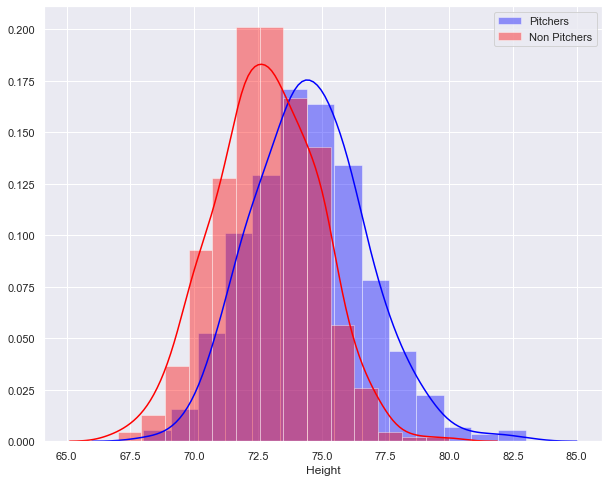

In [20]:
# We could also plot two histograms on top of each other

sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(major_2[major_2.Position=='Pitcher'].Height, color='blue', 
            label='Pitchers', kde=True, bins=14) 
sn.distplot(major_2[major_2.Position!='Pitcher'].Height, color='red', 
            label='Non Pitchers', kde=True, bins=14)
plt.legend();

# I changed the kde flag to True - this gives a curve estimating the distribution,
# but it also scales the histograms to have area 1 (i.e. they represent proportions of the populations)

### A World of Data and a World of Computation

- Data has become **VERY** cheap

High dimensional data (data with lots of features) is now (sometimes) really easy and cheap to collect, and to collect in ways that computers can use (even on the fly). We will look at some methods of collecting data.

- Computational power has become **VERY** cheap

You can rent time on Google Cloud or the Amazon Web Servers for small fractions of a penny per minute. Your company can do it on-demand. At the end of class we will take a look at how to use Google Cloud or Amazon Web Servers. Depending on your teams project, you may want to use it!

### Results are What Matters

In this class we will build models for *Regression* (estimating values of a numerical parameter) and for *Categorization* (estimating values for a categorical parameter) from high dimensional data (data with many features). We will use a process for doing this that will produce a model and an estimate on the error of our model.

In *some* cases we will do it without even worrying or understanding why the model works.

In any case it is possible because data has become cheap enough that we can in many examples afford to set aside a large random sample of our data for testing our algorithm and estimating its error. We will discuss this more when we come to the Data Science Process.

### High Dimensional Problems

Okay so there is a lot going on here. Let us start with an example of what we mean by high dimensional
questions. Consider one of the off diagonal scatter plots from the facet-grid above: Height versus Weight.

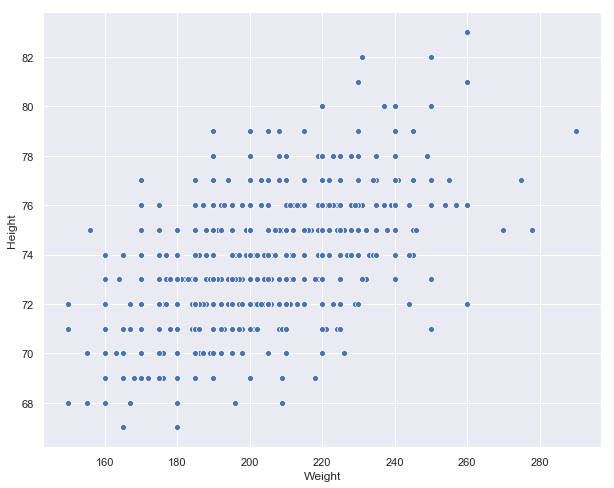

In [21]:
sn.set(style = 'darkgrid')
plt.figure(figsize = (10, 8))

sn.scatterplot(x='Weight', y='Height', data=major_2);

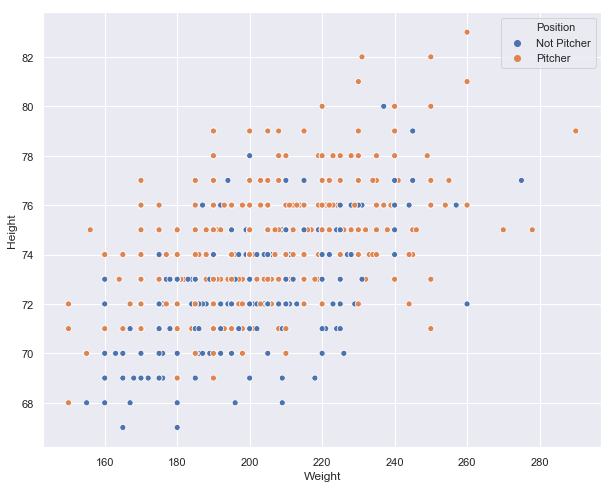

In [23]:
# Let us consider the position of a player in the relationship between Height and Weight.
# What do we notice?

sn.set(style = 'darkgrid')
plt.figure(figsize = (10, 8))

sn.scatterplot(x='Weight', y='Height', hue = 'Position', data=major_2);

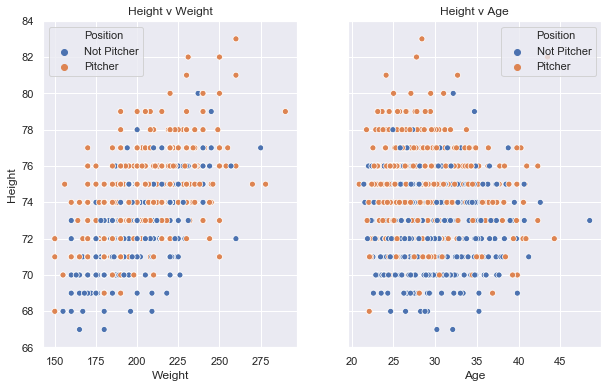

In [62]:
# Let us consider the position of a player in the relationship between Height and Weight.
# What do we notice?

sn.set(style = 'darkgrid')
fig, ax = plt.subplots(1, 2, figsize = (10, 6), sharey=True)

ax[0].title.set_text('Height v Weight')
sn.scatterplot(x='Weight', y='Height', hue = 'Position', data=major_2, ax = ax[0]);
ax[1].title.set_text('Height v Age')
sn.scatterplot(x='Age', y='Height', hue='Position', data=major_2, ax = ax[1]);

## Second Motivating Example - Abalone Characteristics

The task for this example is to take a database of abalone characteristics and determine an alogorithm by which the age of an abalone can be determined. 

This dataset is available from the University of California at Irvine archive.

<img src = 'Images/Abalone.jpeg' width=480>

In [11]:
ab = pa.read_csv('Data Sets/Abalone/abalone.csv', 
                 names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight',
                                          'Rings'])

ab.head()

,Sex,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


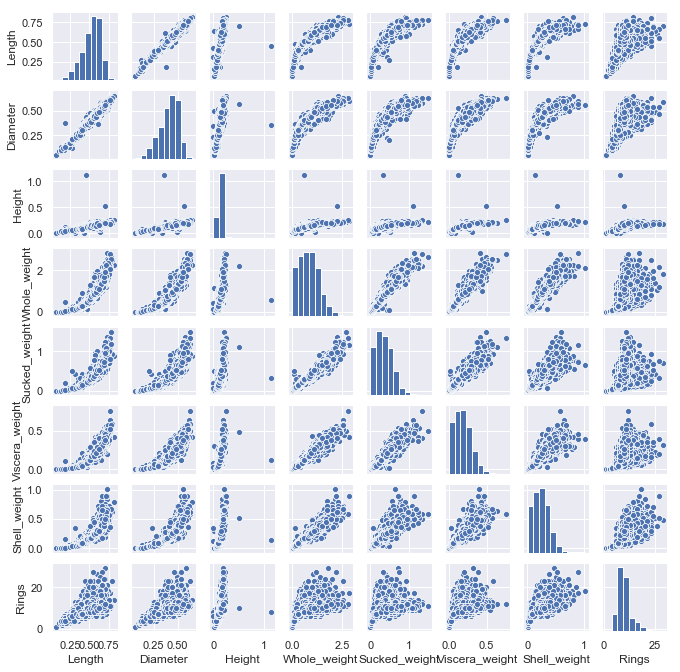

In [97]:
sn.set(style = 'darkgrid')  

p = sn.pairplot(ab)   

p.fig.set_size_inches(9, 9) 

What do you notice about these data points?

Again you see what I mean by high dimensional data.

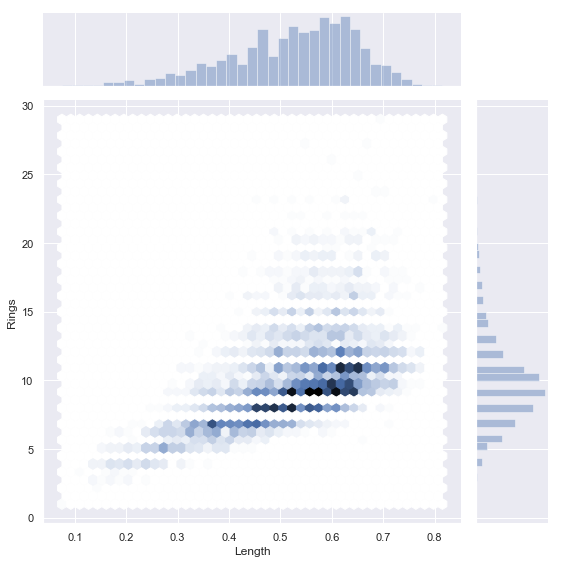

In [14]:
sn.set(style = 'darkgrid')

sn.jointplot(x='Length', y='Rings', data=ab, height=8, kind='hex');


We could think of this as regression or classification.

The challenge I see is that even though we have many features, there appear to be relations between them.

## Third Motivating Example - US Income Levels

We will look at this example now, but there is an ethical consideration with questions like this that you should be thinking about.

In [21]:
ad = pa.read_csv('Data Sets/Adult/adult-data.csv', 
                names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital_status',
                        'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_wk',
                        'country_of_origin', 'income'])

# The folder with the data set also contains a description of the features and a test set.

ad.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_wk,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


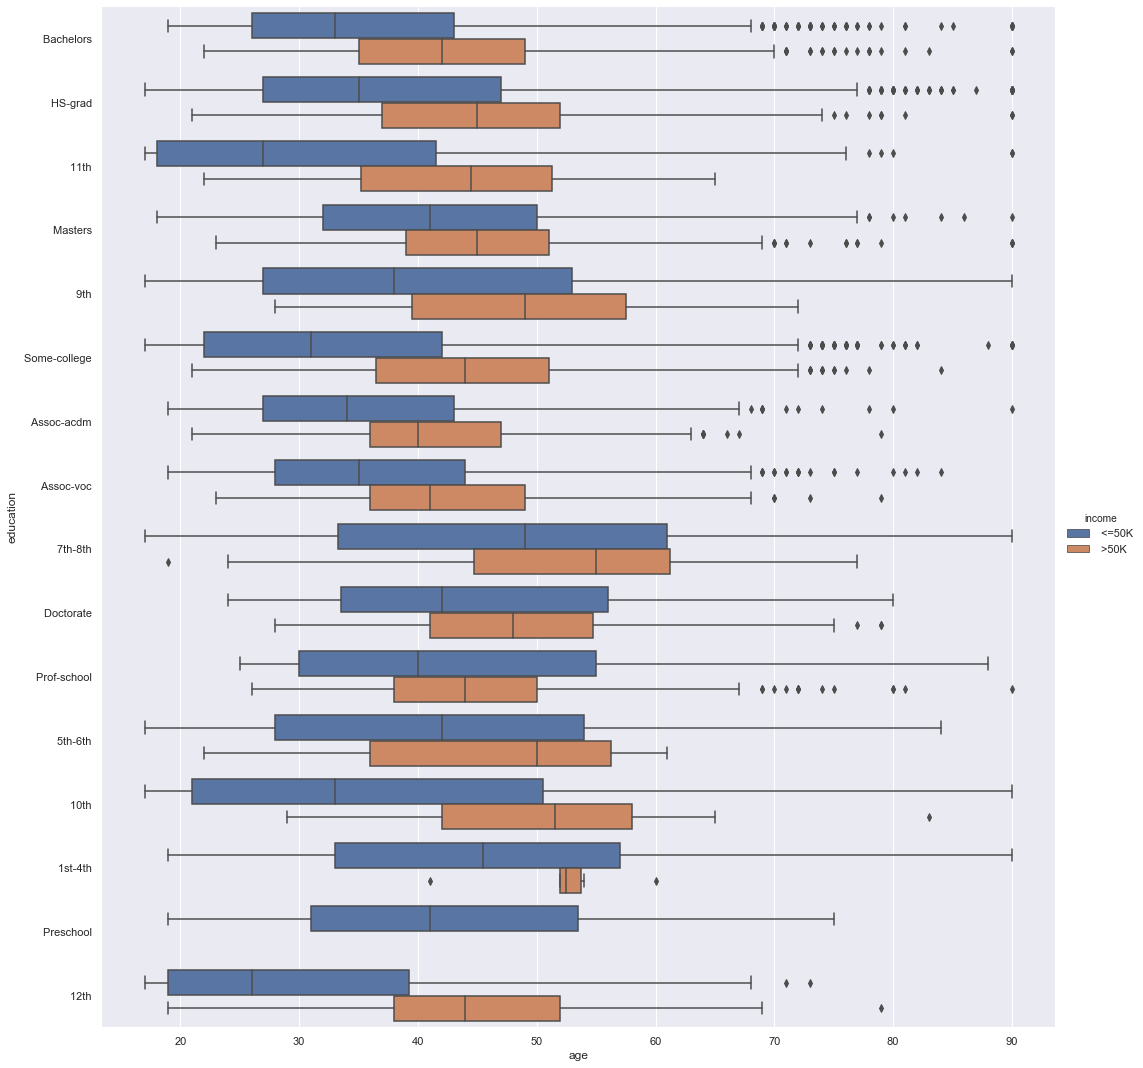

In [26]:
sn.set(style = 'darkgrid')

sn.catplot(x='age', y='education', data = ad, hue='income', height= 15, aspect=1, kind='box');

# There is an issue here: The order of the categories is not sequential by education level, 
# I have tried passing the order argument, but then it generates an empty plot. 

# filing as a bug in Github.

# I think it could be corrected by sorting the data frame by education level first

Is this a good representation of the data?

## Fourth Motivating Example - Mushroom Characteristics

In [191]:
md = pa.read_csv('Data Sets/mushrooms.csv')

print(md.shape)
md.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


This data set is remarkable because every characteristic is a categorical value (some are boolean).

The task is to determine an algorithm for classifying poisonous mushrooms from the characteristics.

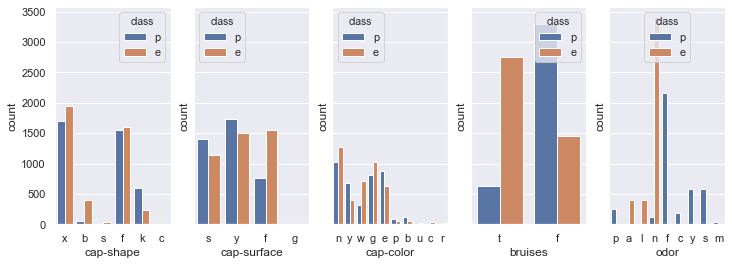

In [208]:
sn.set(style = 'darkgrid')  

f, ax = plt.subplots(1, 5, figsize=(12,4), sharey=True)

temp = list(md.columns.values)
for j in range(5):
    sn.countplot(x=temp[j+1], hue='class', data = md, ax=ax[j]) 

## Fifth Motivating Example - House Prices

In [25]:
# Consider the following dataset about homes that sold in a city in Iowa

hd = pa.read_csv('Data Sets/house-prices/train.csv')

hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
# This data set has an extraordinary number of factors. 
# See the accompanying data_description.txt file that explains them and some of their values.

hd.shape

(1460, 81)

### Regression

The problem here is to use the data set to derive a method of estimating the Sale Price (the last column) based on the features of the home.

This data set comes from [Kaggle.com](http://kaggle.com) and is actually a set for a submission in their competitions. The test set that is accompanying it is the set of features for some homes without the SalePrice and is used for scoring submissions.

<img src='Images/house-price-index_orig.jpg' width=200>

In [28]:
# Let's be a little bit naive and just take a few of these features - 
# we will come back to this example later and explore how to deal with some of the 
# difficulties here.

hd = hd.loc[:, ['1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'TotRmsAbvGrd', 'SalePrice']]

In [29]:
hd.head()

,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,856,854,2,1,3,8,208500
1,1262,0,2,0,3,6,181500
2,920,866,2,1,3,6,223500
3,961,756,1,0,3,7,140000
4,1145,1053,2,1,4,9,250000


This is real data, check if there are any missing values:

In [30]:
for c in hd.columns.values:   # .values creates an iterable object from the list of columns.
    if pa.isna(hd.loc[:, c]).any():
        print('{} has missing values'.format(c))
    else:
        print('No missing values found for {}'.format(c))

                                # pandas.isna checks for missing values (They would show up 
                                # as NaN in the displays of the dataframe).
         
                                # Again .loc[:, c] says to take all rows for column c. 
                                # we use .loc here because we are refering to the actual names and
                                # not the indices.

No missing values found for 1stFlrSF
No missing values found for 2ndFlrSF
No missing values found for FullBath
No missing values found for HalfBath
No missing values found for BedroomAbvGr
No missing values found for TotRmsAbvGrd
No missing values found for SalePrice


A programing note here: verbose output is much more useful than nonverbose. 

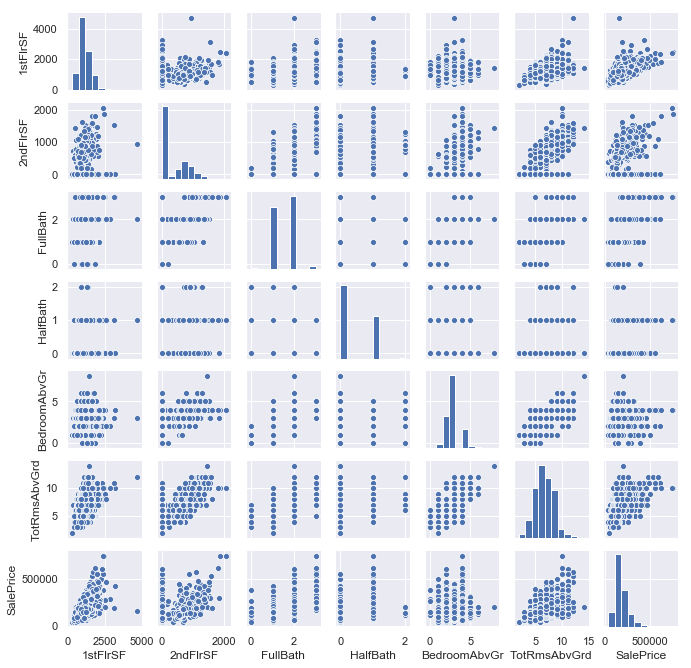

In [31]:
# Make a plot of the dataset by pairs for the numerical data

sn.set(style = 'darkgrid')   # seaborn makes nice looking plots - check the galleries for the various options

p = sn.pairplot(hd)   

# Note that seaborn.pairplot will ignore categorical data (like position) unless we pass it an option.

p.fig.set_size_inches(9, 9) 

### Why Data Science or What is Data Science

This example drives home the dimensional problem we will have, that we need to develop some tools to deal with. Even visualizing multi dimensional data is very challenging for us.

We need to build some tools to add to our toolbox:

1. Methods of identifying variables that provide us with new information about the Sale Price;
2. Conversly methods of identifying variables that are not needed or that have less influence on the sale price.


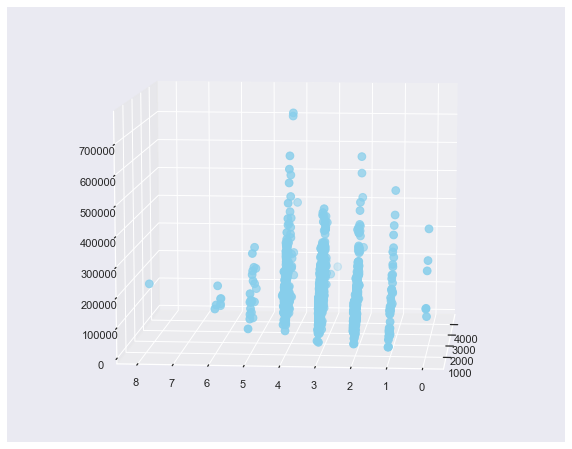

In [32]:
# We can use the matplotlib module to do 3-dimensional plots

from mpl_toolkits.mplot3d import Axes3D    # We lneed an additional module

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')     # 111 sets the relative size of the axes
ax.scatter(hd['1stFlrSF'], hd['BedroomAbvGr'], hd['SalePrice'], c='skyblue', s=60)
ax.view_init(10, 185)   # this sets the perspective we see the graph from 
plt.show()

# There are ways to run this so that you can rotate it - seems to not be working on my mac.
# Generally I've found that 2-d plots with a hue color for a 3rd factor work best.

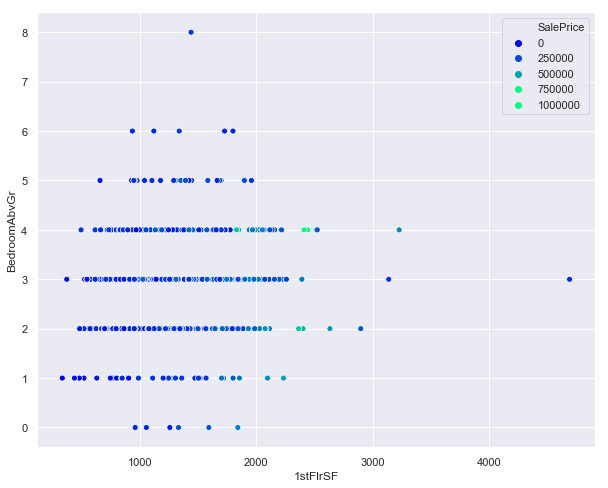

In [69]:
sn.set(style = 'darkgrid')
plt.figure(figsize = (10, 8))

sn.scatterplot(x='1stFlrSF', y='BedroomAbvGr', hue = 'SalePrice', data=hd, palette='winter');

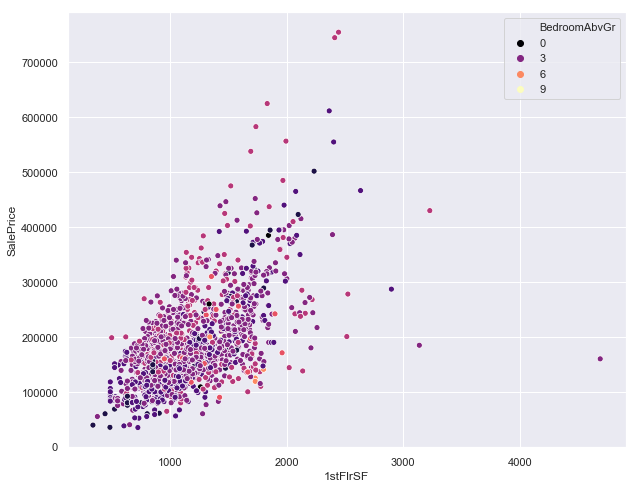

In [34]:
# We are doing regression, so maybe it makes more sense to plot 'SalePrice' as the y-axis and use
# the nearly categorical 'BedroomAbvGr' as the hue.

sn.set(style = 'darkgrid')
plt.figure(figsize = (10, 8))

p = sn.scatterplot(x='1stFlrSF', y='SalePrice', hue = 'BedroomAbvGr', 
                  data = hd, palette = 'magma'); 

ax_fix = p.axes # Saving information about the axis for the next figure

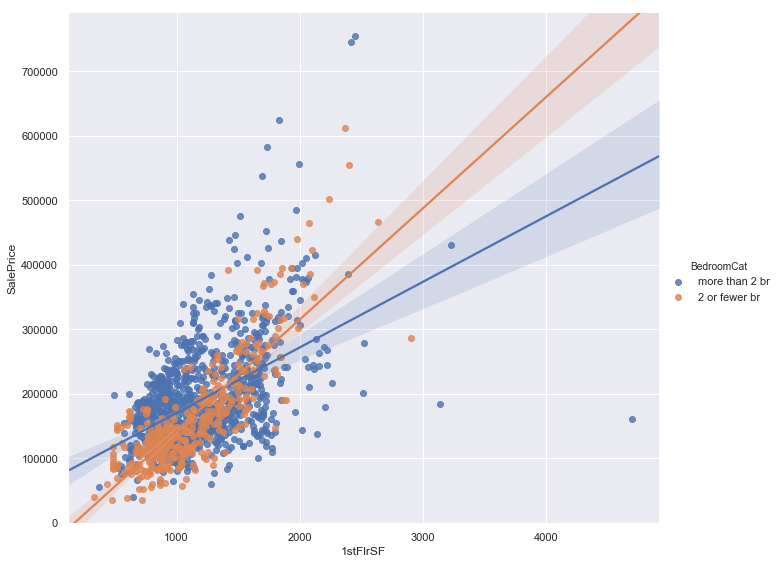

In [35]:
# So a naive thing to try is a separate regression line based on the number of bedrooms.

temp = hd.copy()
for c in temp.index.values:
    if temp.loc[c, 'BedroomAbvGr'] <= 2:
        temp.loc[c, 'BedroomCat'] = '2 or fewer br'
    if temp.loc[c, 'BedroomAbvGr'] > 2:
        temp.loc[c,'BedroomCat'] = 'more than 2 br'    # lmplot automatically chooses the categories for hue.
                                                       # too many hues is confusing, so changed the bedroom
                                                       # count to a categorical variable.
                                                        
                                                        # A better way to do this would have been a boolean
                                                        # as that could be done without the for and if states.
                                                        # however it then would require adjusting the labels

sn.set(style = 'darkgrid')

p = sn.lmplot(x='1stFlrSF', y='SalePrice', hue='BedroomCat', data=temp, height = 8, aspect = 1.2);
ax = p.axes

ax[0,0].set_ylim(ax_fix.get_ylim())  # This took some work using the dir() command and google
ax[0,0].set_xlim(ax_fix.get_xlim());  # These two commands set the axes scale below to match the previous graph.

You may have seen regression lines in Calculus or Linear Algebra.

We will come back to this example again and develop methods of being more precise; and Linear Regression will be one of our foundational examples of a statistical learning method.

## Sixth Motivating Example - Running Data from Garmin

I have been dealing with an injury for the last month; however I generally try to run close to an hour a day. Here is a report of my running activities from Garmin.

In [179]:
run = pa.read_csv('Data Sets/Pierce_Garmin.csv')

print(run.shape)
run.head()

(320, 29)


,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Training Stress Score®,Grit,Flow,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Runs,Max Temp
0,running,2019-07-19 05:21:10,False,Greeley Running,3.77,685,00:45:03,150,178,3.6,...,0.0,0.0,0.0,0:00,0.0,0:00,No,00:53.68,8,0.0
1,running,2019-07-17 04:58:51,False,Greeley Running,3.01,511,00:33:08,146,164,3.3,...,0.0,0.0,0.0,0:00,0.0,0:00,No,00:09.83,4,0.0
2,running,2019-07-13 05:35:07,False,Greeley Running,6.01,"1,077",01:05:11,156,177,5.0,...,0.0,0.0,0.0,0:00,0.0,0:00,No,00:10.53,7,0.0
3,running,2019-06-30 05:41:56,False,Greeley Running,10.01,"1,601",01:54:59,146,168,4.0,...,0.0,0.0,0.0,0:00,0.0,0:00,No,00:14.31,11,0.0
4,running,2019-06-29 06:31:11,False,Larimer County Running,7.06,"1,921",02:59:37,143,179,4.2,...,0.0,0.0,0.0,0:00,0.0,0:00,No,01:24.86,8,0.0


Note the big change for this example here is that we have Dates and Times!

In [180]:
def hours(timestr):   # function to convert HH:MM:SS to Hours decimal

    ftr = [1, 1/60, 1/60/60]

    return sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))])

In [187]:
run.loc[:, 'Hours'] = list(map(hours, run.Time))  # Adding a feature that is the hours of the run as a decimal

In [184]:
run.loc[run.loc[:, 'Avg HR']=='--', 'Avg HR'] = 'np.nan'   

# Replacing Garmins symbol for no-data with Pandas, as a string so we can pass it to eval in map.
 
run.loc[:, 'Avg HR'] = list(map(eval, run.loc[:, 'Avg HR'] ))

# Even though much of the data is numeric, it was loaded as strings (probably because
# of the .csv file Garmin gave us). Easy enough in Python to convert strings to numbers by passing them
# through eval with map as long as none of them are gibberish like '--'

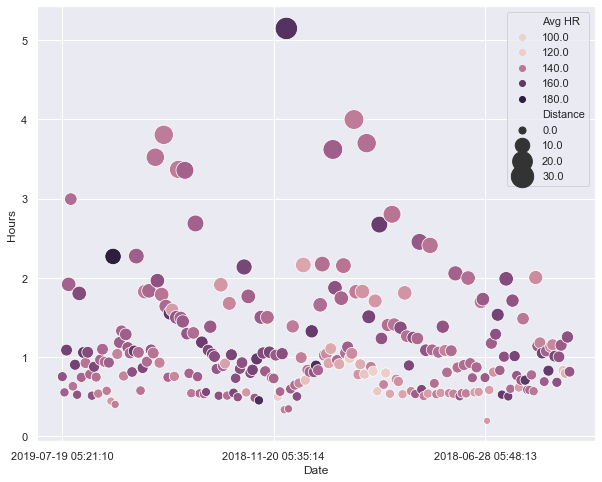

In [189]:
sn.set()
fig, axes = plt.subplots(1, 1, figsize=(10, 8));

sn.scatterplot(x='Date', y='Hours', size='Distance', hue='Avg HR',
               sizes = (50, 500), data=run, ax=axes);

axes.xaxis.set_major_locator(plt.MultipleLocator(100))  
# This is a little trick to only use every 100th tick label.

It would be nice to adjust the x-axis ticks here so that it is just the date and not the start time - that could be done by adjusting the values for Date.

Also the longest run plotted is the NYC Marathon, it would be nice to add a label to it.

## Seventh Motivating Example - Berlin Airbnb Data

This is a regression problem, however it is also an example of what to me is the most promosing aspect of Data Science as a field - the development of algorithms that interpret and react to human language.

note: the other really promising aspect of the field is computer vision - the development of algorithms that interpret and react to images.

This example is also unique in that there are a number of data files attached to it, and to analyze it well they need to be connected. 

### Big Data

This is also an example of what we might call big data (though this is small big). The files are too big for Excell - we could not analyze them without using technology like Python or R.

The files are also too big for Github, so we will need to load them from a dropbox link. Strangely this is easy, there is just one thing to change in the link Dropbox gives us for the file.

In [11]:
# First we get a link from drop box
# https://www.dropbox.com/s/lqin9zpgfwyt924/calendar_summary.csv?dl=0

# The trick here is that the last digit 'dl=0' needs to be changed to 'dl=1' and then 
# we just feed it into pandas.read_csv as we have above.

# This takes a while - it is downloading the information and then processing it, and it is more data
# than our other examples have used.

calendar = pa.read_csv('https://www.dropbox.com/s/lqin9zpgfwyt924/calendar_summary.csv?dl=1')
listings_sum = pa.read_csv('https://www.dropbox.com/s/5noljx9qipcyyul/listings_summary.csv?dl=1')
listings = pa.read_csv('https://www.dropbox.com/s/xtkx018qxjfjlah/listings.csv?dl=1')
neighborhoods = pa.read_csv('https://www.dropbox.com/s/rfqozggf5f2kzlu/neighbourhoods.csv?dl=1')
reviews_sum = pa.read_csv('https://www.dropbox.com/s/o8gvfm708g1cocf/reviews_summary.csv?dl=1')
reviews = pa.read_csv('https://www.dropbox.com/s/8dfu8qyc6n6cw3p/reviews.csv?dl=1')

In [13]:
print(listings_sum.shape)
listings_sum.head()

(22552, 96)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [17]:
print(listings.shape)
listings.head()

(22552, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [20]:
print(reviews_sum.shape)
reviews_sum.head()

(401963, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [27]:
import random
calendar = calendar.loc[calendar.available!='f']
print(calendar.shape)
calendar.iloc[[random.randint(0, calendar.shape[0]) for x in range(10)], :]

(1800841, 4)


,listing_id,date,available,price
7136204,25878753,2019-06-21,t,$100.00
5648911,21293120,2019-02-04,t,$26.00
704075,2862921,2019-03-24,t,$39.00
3051375,12184991,2019-10-06,t,$26.00
1335090,5707717,2019-03-27,t,$35.00
3740439,15531846,2019-04-19,t,$55.00
7406577,27010018,2019-07-18,t,$50.00
4201976,17338098,2019-01-01,t,$60.00
1360113,5635941,2019-05-13,t,$57.00
4525117,18454444,2019-04-14,t,$70.00


So notice the issues:

1. We will need to use the listing id to follow from one of the facets to the other
2. While the airbnb supplied data - listings and neighborhood descriptions are in English, the reviews are in multiple languages.
3. In addition to the text for the listings we also have dates, geocoordinates, and some numerical data.


## Eighth Motivating Example - Colorado Child Care

<img src='Images/child-care.jpeg' width=400>

In [29]:
# Consider the following data set of licenses for child care business in Colorado 
#   (from https://data.colorado.gov/)

cocc = pa.read_csv('Data Sets/Colorado_Licensed_Child_Care_Facilities_Report.csv')

cocc.head()

,PROVIDER ID,PROVIDER NAME,PROVIDER SERVICE TYPE,STREET ADDRESS,CITY,STATE,ZIP,COUNTY,COMMUNITY,ECC,...,CCCAP CASE COUNT_D1,CCCAP FA EXP DATE_D1,CCCAP TOTAL AUTH_D1,CCCAP FA STATUS_D1,CCCAP AMOUNT PAID_D1,CCCAP FA EXP DATE_D2,CCCAP TOTAL AUTH_D2,CCCAP FA STATUS_D2,LICENSE FEE DISCOUNT,LONG-LAT
0,48,VIKKI MCKEOGH,Experienced Family Child Care Home,6635 E Monaco DR,Brighton,CO,80602,Adams,West Adams,Early Childhood Partnership of Adams County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"(39.919258, -104.911005)"
1,65,JACKIE GRAY,Family Child Care Home,4388 118 Ave.,Thornton,CO,80233,Adams,West Adams,Early Childhood Partnership of Adams County,...,3.0,06/30/2019,3.0,1.0,239.20,06/14/2019,3.0,1.0,0.0,"(39.9101, -104.9344)"
2,100,CHEROKEE TRAIL ELEMENTARY KIDS CENTER,School-Age Child Care Center,17302 Clarke Farms DR,Parker,CO,80134,Douglas,Parker,Douglas County Early Childhood Council,...,3.0,06/30/2019,5.0,1.0,974.61,05/31/2020,5.0,1.0,0.0,"(39.525183, -104.786646)"
3,115,EARLY CHILDHOOD EDUCATION,Preschool Program,1023 N 31st ST,Colorado Springs,CO,80904,El Paso,Colorado Springs,Alliance for Kids,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"(38.86547, -104.867475)"
4,157,CHERLLYNN SAUNDERS,Infant/Toddler Home,5989 W Fair DR,Littleton,CO,80123,Jefferson,Northeast Jefferson,Triad Early Childhood Council,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"(39.604151, -105.063248)"


In [30]:
cocc = pa.read_csv('Data Sets/Colorado_Licensed_Child_Care_Facilities_Report.csv')
cocc = cocc.loc[:, ['COUNTY', 'CITY', 'PROVIDER SERVICE TYPE']]  # Keep only the columns we want here
cocc.loc[:, 'COUNT'] = 1   # Add a variable for counting unique values
cocc = cocc.groupby(['COUNTY', 'CITY', 'PROVIDER SERVICE TYPE']).sum()   
 # Sum the values after grouping by County, 
       # City, and Provider Type
    
cocc.head()

COUNT
COUNTY CITY   PROVIDER SERVICE TYPE                    
Adams  Arvada Child Care Center                       2
       Aurora Child Care Center                      10
              Experienced Family Child Care Home      1
              Family Child Care Home                  2
              Preschool Program                       7

Worth pausing here and making sure we understand what we have done: We have created a new data frame whose rows are now the County, City, and Provider Type factors; and the single Column is the Count of the number of 
that Provider Type in the City.

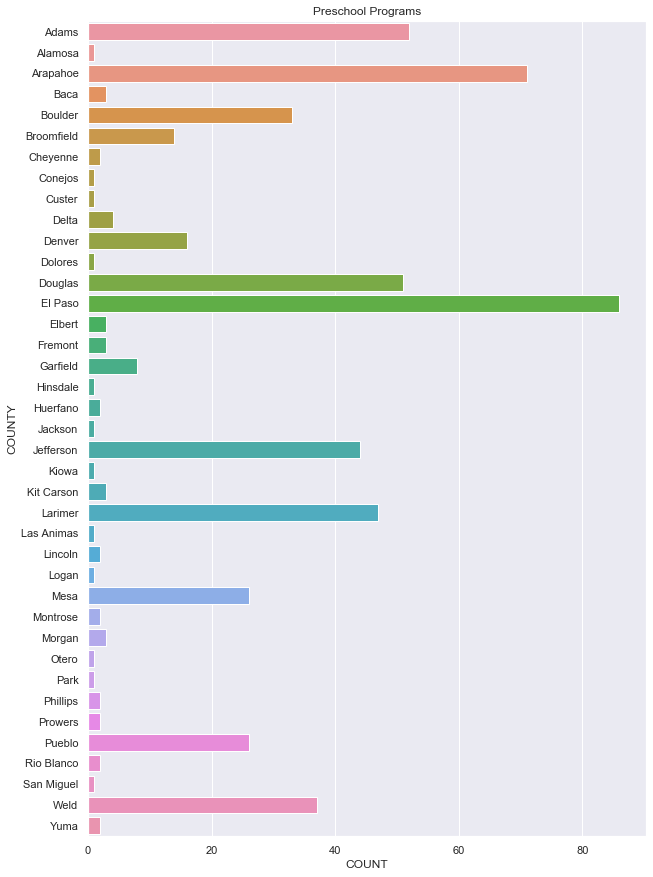

In [31]:
temp = cocc.reset_index().loc[:, ['COUNTY', 'PROVIDER SERVICE TYPE', 'COUNT']]  

# Drop the city and go back to a full data frame.

temp = temp.groupby(['COUNTY', 'PROVIDER SERVICE TYPE']).sum()

# Redo the gather but now ignoring City

temp = temp.reset_index()

# Set it back to a full data frame.

temp = temp[temp['PROVIDER SERVICE TYPE']=='Preschool Program']

plt.figure(figsize = (10, 15))
sn.set(style='darkgrid')
sn.barplot(x='COUNT', y='COUNTY', data=temp)
plt.title('Preschool Programs');

Fine for someone from Colorado. But can we do better?

In [32]:
cocc = pa.read_csv('Data Sets/Colorado_Licensed_Child_Care_Facilities_Report.csv')
temp = cocc.loc[:, ['PROVIDER SERVICE TYPE', 'LONG-LAT'] ]

# pull up the longitude and lattitude coordinates
 
lon = [eval(temp.loc[c, 'LONG-LAT'])[0] for c in temp.index.values]
lat = [eval(temp.loc[c, 'LONG-LAT'])[1] for c in temp.index.values]
    
# Separate the longitude and lattide coordinates
# Some notes on the Python here:  the coordinates have been read in as a string, we can convert them to a 
# tuple with eval and then reference each with a position index.

locate = pa.DataFrame(np.array( [lon, lat]).transpose(), columns = ['Long', 'Lat'])
locate = pa.concat( [locate, temp], axis=1).drop('LONG-LAT', axis=1)

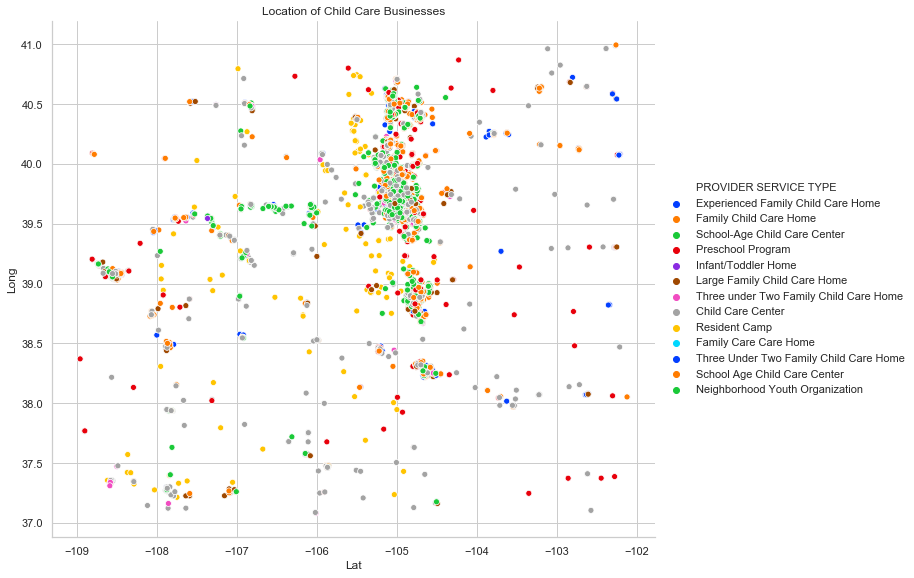

In [33]:
sn.set(style='whitegrid')
sn.hls_palette(10)
sn.relplot(x='Lat', y='Long', hue='PROVIDER SERVICE TYPE', 
           data=locate, height=8, aspect=1.2, palette='bright');
plt.title('Location of Child Care Businesses');

A couple of notes of things we should learn how to do in the future:

1. It would be nice to put these points on a map of Colorado; or to put points for the larger cities in the state.
2. It would also be nice to change it to combine near by points and make a bigger point.

#### What is a good question for this data set?

## Ninth Motivating Example - Flight Delays at DEN

<img src='Images/flights-denver.jpg' width=400>

In [41]:
# Consider the following dataset of the flights originating at DEN in 2008

fd = pa.read_csv('Data Sets/DenverDelayedFlights.csv')

fd = fd.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

fd.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,4,5,1437.0,1415,1548.0,1530,WN,806,...,9.0,11.0,0,N,0,8.0,0.0,0.0,0.0,10.0
1,2008,1,4,5,1358.0,1345,1652.0,1645,WN,1856,...,5.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,4,5,1614.0,1555,1926.0,1920,WN,1262,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,4,5,1736.0,1700,2234.0,2215,WN,494,...,2.0,7.0,0,N,0,4.0,0.0,0.0,0.0,15.0
4,2008,1,4,5,2041.0,1925,2343.0,2245,WN,2907,...,2.0,10.0,0,N,0,2.0,0.0,0.0,0.0,56.0


In [42]:
fd.shape

(74323, 29)

In [43]:
print('Cancelled flights: {}, Non Cancelled Flights: {} \n'.format(sum(fd.Cancelled == 1), 
                                                                sum(fd.Cancelled == 0)) )
print('{0:.6f}'.format( 100*sum(fd.Cancelled == 1) / fd.shape[0] ))

Cancelled flights: 35, Non Cancelled Flights: 74288 

0.047092


This is going to be a difficult classification question. Less than 0.05% of flights were cancelled.

In [44]:
fd[ fd.Cancelled == 1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
58441,2008,10,10,5,1502.0,1450,NaN,1546,YV,7097,...,NaN,14.0,1,B,0,NaN,NaN,NaN,NaN,NaN
58760,2008,10,5,7,1852.0,1738,NaN,1904,OO,6224,...,NaN,39.0,1,A,0,NaN,NaN,NaN,NaN,NaN
62298,2008,11,5,3,1032.0,1026,NaN,1125,YV,7151,...,NaN,19.0,1,B,0,NaN,NaN,NaN,NaN,NaN
62375,2008,11,29,6,1319.0,1257,NaN,1356,YV,7098,...,NaN,14.0,1,B,0,NaN,NaN,NaN,NaN,NaN
62376,2008,11,29,6,1030.0,1021,NaN,1120,YV,7151,...,NaN,24.0,1,B,0,NaN,NaN,NaN,NaN,NaN
62386,2008,11,30,7,1255.0,1123,NaN,1224,YV,7193,...,NaN,33.0,1,B,0,NaN,NaN,NaN,NaN,NaN
66243,2008,12,20,6,2125.0,1955,NaN,2205,WN,76,...,NaN,15.0,1,B,0,NaN,NaN,NaN,NaN,NaN
66994,2008,12,4,4,1147.0,1125,NaN,1226,YV,7193,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
67031,2008,12,8,1,1530.0,1513,NaN,1621,YV,7062,...,NaN,21.0,1,B,0,NaN,NaN,NaN,NaN,NaN
67096,2008,12,15,1,1806.0,1755,NaN,1853,YV,7151,...,NaN,34.0,1,B,0,NaN,NaN,NaN,NaN,NaN


#### What are some good questions for this data set?

## Tenth Motivating Example - Image Classification

We are actually planning on skipping this topic in this class, but it is important enough that it deserves a mention. Many of the techniques for classification we are using will work on it.

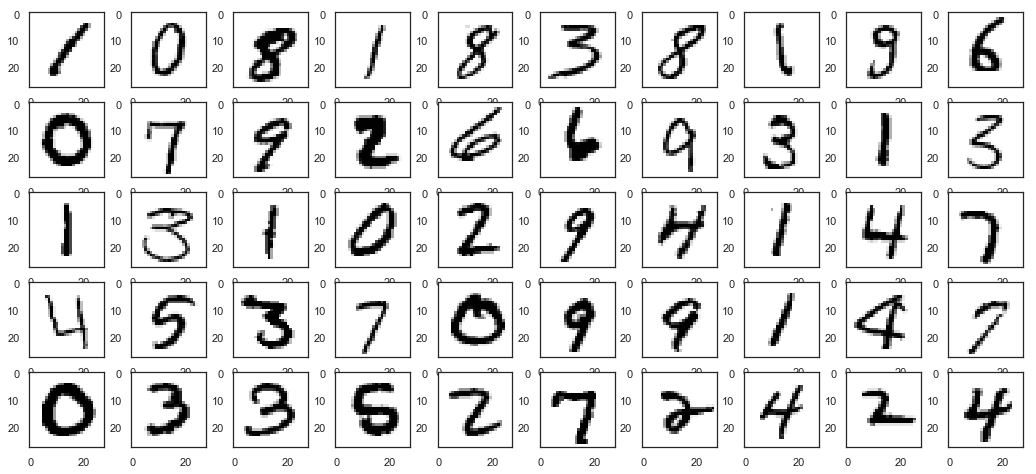

In [78]:
digits = pa.read_csv('Data Sets/digits/train.csv')

sn.set(style = 'white')
fig, ax = plt.subplots(5, 10, figsize = (18, 8))

for i in range(50):
    ax[i%5][i//5].imshow( np.array(digits.iloc[i, 1:]).reshape(28, 28), cmap = 'binary' )

The task is to develop an algorithm for deciding which digit a handwritten digit is.

## Left for a future class - Unsupervised Learning

All of these examples, except possibly the child care one, are what we would call *supervised learning*. We will be discussing *unsupervised learning*, but I am leaving it for a future class to go over. Your team projects in particular should be either a categorization or regression problem in supervised learning.